# In this notebook
I look at how land use percentage correlates with temperature. I show that there appears to be stronger positive correlations with concrete and higher temperatures, and strong negative correlations with tree cover. This is generally as expected.

In [4]:
import os
import numpy as np

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.nn import functional as F

from sklearn.metrics import r2_score
from matplotlib import pyplot as plt

from torchvision import transforms

from torch import nn, optim

In [2]:
t_trans = transforms.Compose([
    transforms.RandomRotation(90),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip()
])

class OneHotImages(Dataset):
    def __init__(self, file_path, transforms=None):
        self.file_path = file_path

        # Images
        self.files = os.listdir(os.path.join(file_path, "img"))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img = torch.load(os.path.join(self.file_path, "img", self.files[idx]))

        with open(
            os.path.join(self.file_path, "labels", self.files[idx][:-3] + ".txt")
        ) as fp:
            label = float(fp.read())
        # Omit the tree class
        return img[:, :, [0,1,3]], torch.tensor(label, dtype=torch.float)

In [5]:
train = OneHotImages("/datacommons/carlsonlab/zdc6/cs590/land_use/train", transforms = t_trans)
test = OneHotImages("/datacommons/carlsonlab/zdc6/cs590/land_use/test")

In [29]:
pct_1 = []
pct_2 = []
pct_3 = []
labels = []
for img, label in train:
    pct_1.append((img[:, :, 0].sum() / 256**2).item())
    pct_2.append((img[:, :, 1].sum() / 256**2).item())
    pct_3.append((img[:, :, 2].sum() / 256**2).item())
    labels.append(label.item())
    


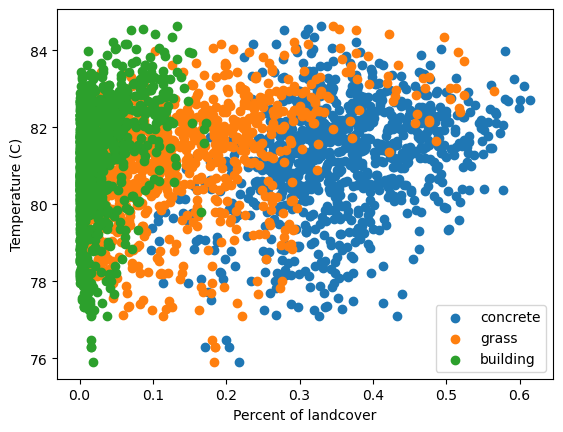

In [31]:
plt.scatter(pct_1, labels, label='concrete')
plt.scatter(pct_2, labels, label='grass')
plt.scatter(pct_3, labels, label='building')
plt.legend()
plt.xlabel('Percent of landcover')
plt.ylabel('Temperature (C)')
plt.show()

# Let's now reimagine the measurements, to compute the same thing, but with trees. We should expect the opposite relationship

In [32]:
class OneHotImages(Dataset):
    def __init__(self, file_path, transforms=None):
        self.file_path = file_path

        # Images
        self.files = os.listdir(os.path.join(file_path, "img"))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img = torch.load(os.path.join(self.file_path, "img", self.files[idx]))

        with open(
            os.path.join(self.file_path, "labels", self.files[idx][:-3] + ".txt")
        ) as fp:
            label = float(fp.read())
        # Omit the tree class
        return img, torch.tensor(label, dtype=torch.float)
    
    
train = OneHotImages("/datacommons/carlsonlab/zdc6/cs590/land_use/train", transforms = t_trans)
test = OneHotImages("/datacommons/carlsonlab/zdc6/cs590/land_use/test")

In [33]:
pct_1 = []
pct_2 = []
pct_3 = []
pct_4 = []
labels = []
for img, label in train:
    pct_1.append((img[:, :, 0].sum() / 256**2).item())
    pct_2.append((img[:, :, 1].sum() / 256**2).item())
    pct_3.append((img[:, :, 2].sum() / 256**2).item())
    pct_4.append((img[:, :, 3].sum() / 256**2).item())

    labels.append(label.item())
    

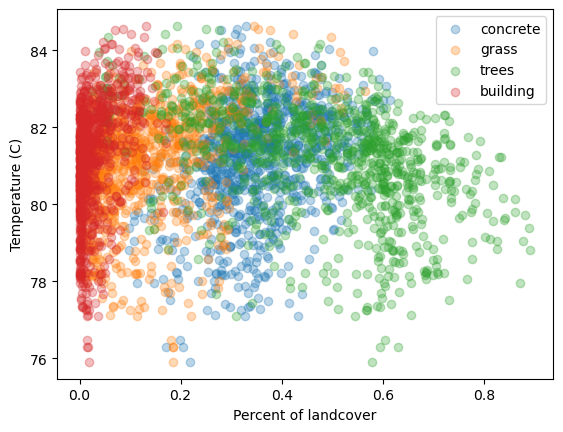

In [37]:
a = 0.3
plt.scatter(pct_1, labels, label='concrete', alpha=a)
plt.scatter(pct_2, labels, label='grass', alpha=a)
plt.scatter(pct_3, labels, label='trees', alpha=a)
plt.scatter(pct_4, labels, label='building', alpha=a)
plt.legend()
plt.xlabel('Percent of landcover')
plt.ylabel('Temperature (C)')
plt.show()